In [1]:
#read data
sms_raw=read.csv("sms_spam.csv",stringsAsFactors = FALSE)
sms_raw$type=as.factor(sms_raw$type)

In [2]:
#install text mining lib

#install.packages("tm")
library(tm)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [3]:
#CREATING CORPUS
sms_corpus=VCorpus(VectorSource(sms_raw$text))
sms_corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5574

In [4]:
inspect(sms_corpus[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 111

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 29



In [5]:
#look at a message
as.character(sms_corpus[[2]])

[1] "Ok lar... Joking wif u oni..."

In [6]:
#look at first three message
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

$`2`
[1] "Ok lar... Joking wif u oni..."

$`3`
[1] "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [7]:
#tRANSFORMING ALL THE SMS IN TO LOWER LETTER
sms_corpus_clean=tm_map(sms_corpus,content_transformer(tolower))

In [8]:
#removing Numbers
sms_corpus_clean=tm_map(sms_corpus_clean,removeNumbers)

In [9]:
#removing StopWords
sms_corpus_clean=tm_map(sms_corpus_clean,removeWords,stopwords())

In [10]:
#removing Punctuation
sms_corpus_clean=tm_map(sms_corpus_clean,removePunctuation)

In [11]:
#Stemming
#install.packages("SnowballC")
library(SnowballC)
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stemDocument)

Warning message:
"package 'SnowballC' was built under R version 3.6.3"

In [12]:
#Removing Extra WhiteSpace
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stripWhitespace)

In [13]:
#Document Term Matrix(Tokenization)
sms_dtm=DocumentTermMatrix(sms_corpus_clean)
sms_dtm

<<DocumentTermMatrix (documents: 5574, terms: 6611)>>
Non-/sparse entries: 42653/36807061
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [14]:
sms_dtm_train=sms_dtm[1:4174,]
sms_dtm_test=sms_dtm[4175:5574,]

In [15]:
sms_train_labels=sms_raw[1:4174,]$type
sms_test_labels=sms_raw[4175:5574,]$type

In [16]:
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

sms_train_labels
      ham      spam 
0.8646382 0.1353618 

sms_test_labels
 ham spam 
0.87 0.13 

Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


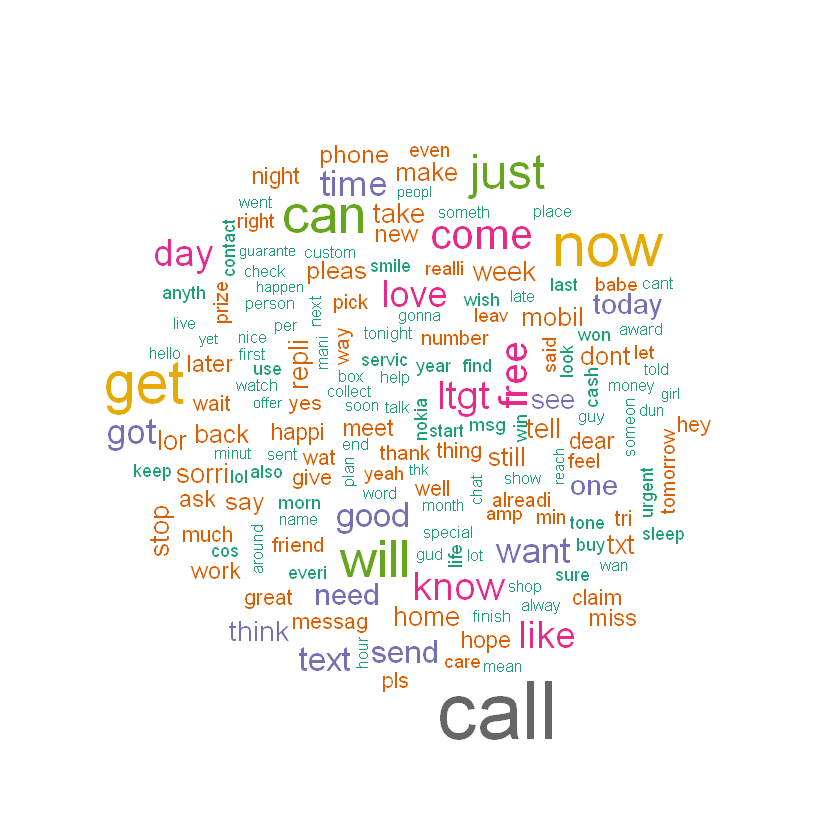

In [17]:
#visualize text using wordcloud
#install.packages("wordcloud")

library(wordcloud)
wordcloud(sms_corpus_clean,min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

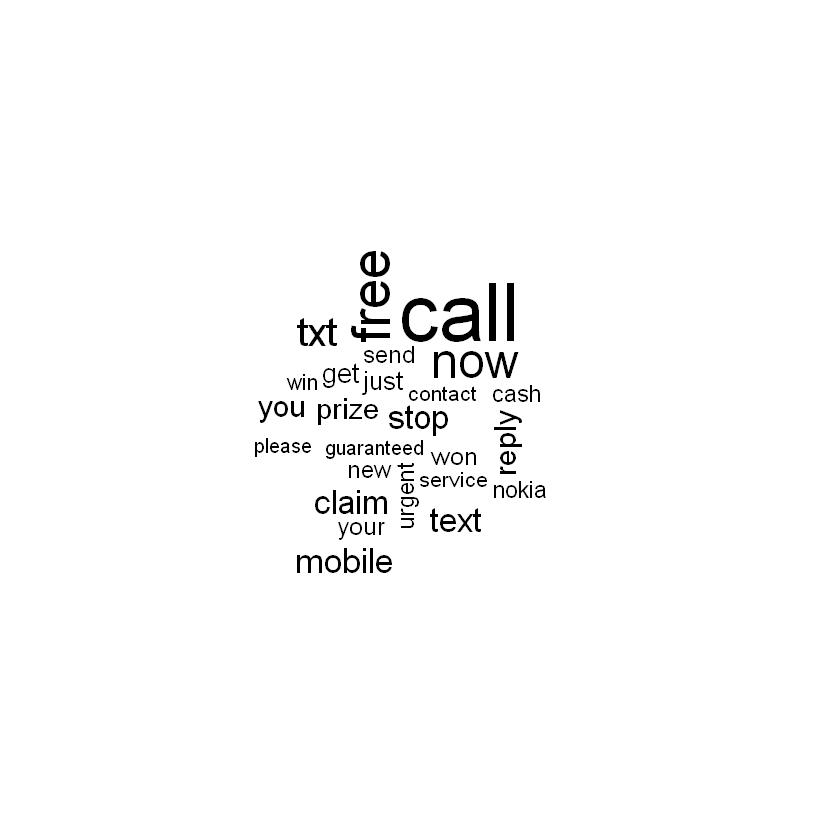

In [18]:
#look at subsets
spam=subset(sms_raw,type=="spam")
ham=subset(sms_raw,type=="ham")

wordcloud(spam$text,min.freq = 50)

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"

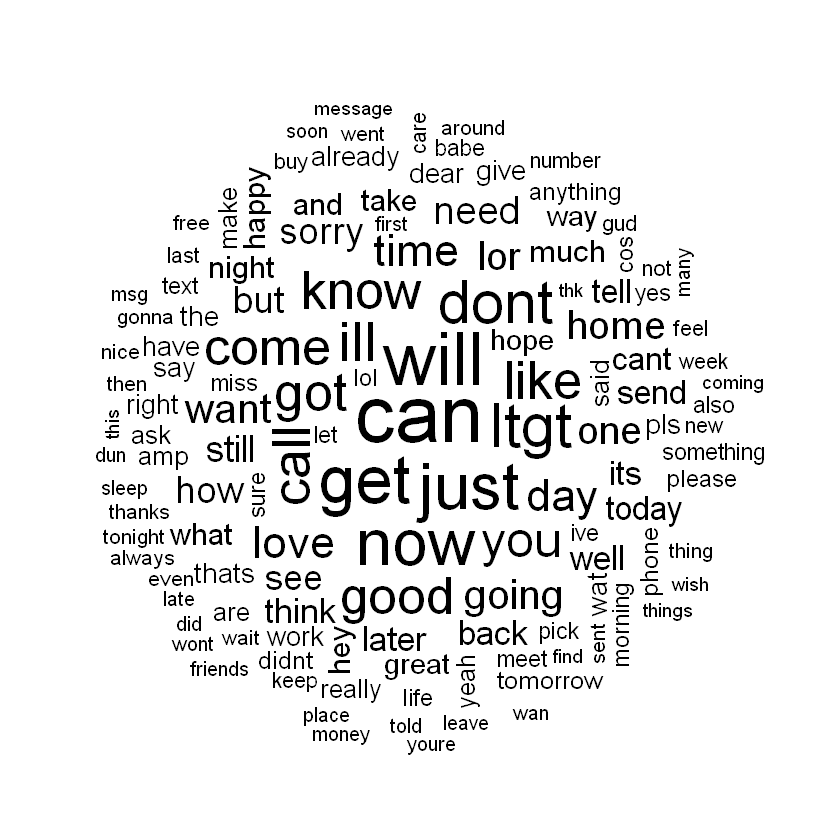

In [19]:
wordcloud(ham$text,min.freq = 50,random.order = FALSE)

In [20]:
#look at freq words
sms_freq_words=findFreqTerms(sms_dtm_train,5)
sms_freq_words

[1] "â£wk"          "â\200¦"           "â\200“"           "abiola"       
   [5] "abl"           "abt"           "accept"        "access"       
   [9] "account"       "across"        "activ"         "actual"       
  [13] "add"           "address"       "admir"         "adult"        
  [17] "advanc"        "aft"           "afternoon"     "aftr"         
  [21] "age"           "ago"           "ahead"         "ahmad"        
  [25] "aight"         "aint"          "air"           "aiyah"        
  [29] "alex"          "almost"        "alon"          "alreadi"      
  [33] "alright"       "alrit"         "also"          "alway"        
  [37] "amp"           "angri"         "announc"       "anoth"        
  [41] "answer"        "anybodi"       "anymor"        "anyon"        
  [45] "anyth"         "anytim"        "anyway"        "apart"        
  [49] "app"           "appli"         "appoint"       "appreci"      
  [53] "april"         "ard"           "area"          "argument"     
  [57] "arm"           "around"        "arrang"        "arrest"       
  [61] "arriv"         "asap"          "ask"           "askd"         
  [65] "asleep"        "ass"           "attempt"       "auction"      
  [69] "avail"         "ave"           "avoid"         "await"        
  [73] "award"         "away"          "awesom"        "babe"         
  [77] "babi"          "back"          "bad"           "bag"          
  [81] "bak"           "balanc"        "bank"          "bare"         
  [85] "bath"          "batteri"       "bcoz"          "bcum"         
  [89] "bday"          "beauti"        "becom"         "bed"          
  [93] "bedroom"       "begin"         "believ"        "belli"        
  [97] "best"          "better"        "bid"           "big"          
 [101] "bill"          "bird"          "birthday"      "bit"          
 [105] "black"         "blank"         "bless"         "blue"         
 [109] "bluetooth"     "bodi"          "bold"          "bonus"        
 [113] "boo"           "book"          "bore"          "boss"         
 [117] "bother"        "bout"          "bowl"          "box"          
 [121] "boy"           "boytoy"        "brand"         "break"        
 [125] "breath"        "brilliant"     "bring"         "brother"      
 [129] "bslvyl"        "btnationalr"   "budget"        "bugi"         
 [133] "bus"           "busi"          "buy"           "buzz"         
 [137] "cabin"         "cafe"          "cal"           "call"         
 [141] "caller"        "callertun"     "camcord"       "came"         
 [145] "camera"        "can"           "cancel"        "cant"         
 [149] "car"           "card"          "care"          "carlo"        
 [153] "case"          "cash"          "cashbal"       "catch"        
 [157] "caus"          "chanc"         "chang"         "charact"      
 [161] "charg"         "chariti"       "chat"          "cheap"        
 [165] "check"         "cheer"         "chennai"       "chikku"       
 [169] "childish"      "children"      "chines"        "choic"        
 [173] "choos"         "christma"      "cine"          "cinema"       
 [177] "claim"         "class"         "clean"         "clear"        
 [181] "click"         "clock"         "close"         "club"         
 [185] "code"          "coffe"         "coin"          "cold"         
 [189] "colleagu"      "collect"       "colleg"        "colour"       
 [193] "come"          "comin"         "comp"          "compani"      
 [197] "competit"      "complet"       "complimentari" "comput"       
 [201] "concentr"      "condit"        "confid"        "confirm"      
 [205] "congrat"       "congratul"     "connect"       "contact"      
 [209] "content"       "convey"        "cook"          "cool"         
 [213] "copi"          "correct"       "cos"           "cost"         
 [217] "countri"       "coupl"         "cours"         "cover"        
 [221] "coz"           "crave"         "crazi"         "credit"       
 [225] "cri"         

In [21]:
sms_dtm_freq_train=sms_dtm_train[,sms_freq_words]
sms_dtm_freq_train

<<DocumentTermMatrix (documents: 4174, terms: 1160)>>
Non-/sparse entries: 25241/4816599
Sparsity           : 99%
Maximal term length: 13
Weighting          : term frequency (tf)

In [22]:
dim(sms_dtm_freq_train)

[1] 4174 1160

In [23]:
sms_dtm_freq_test=sms_dtm_test[,sms_freq_words]
dim(sms_dtm_freq_test)

[1] 1400 1160

In [24]:
#convert to counts
convert_counts=function(x){
  x=ifelse(x>0,"Yes","No")
}

sms_train=apply(sms_dtm_freq_train,2,convert_counts)
sms_test=apply(sms_dtm_freq_test, 2, convert_counts)

In [25]:
#fit model to data
library(e1071)
sms_classifier=naiveBayes(sms_train,sms_train_labels)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [26]:
#make preds
sms_test_pred=predict(sms_classifier,sms_test)

In [27]:
#look at crosstables
library(gmodels)
CrossTable(sms_test_pred,sms_test_labels,
           prop.chisq = FALSE,
           dnn = c("predicted","actual"))

Warning message:
"package 'gmodels' was built under R version 3.6.3"


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1400 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1209 |        20 |      1229 | 
             |     0.984 |     0.016 |     0.878 | 
             |     0.993 |     0.110 |           | 
             |     0.864 |     0.014 |           | 
-------------|-----------|-----------|-----------|
        spam |         9 |       162 |       171 | 
             |     0.053 |     0.947 |     0.122 | 
             |     0.007 |     0.890 |           | 
             |     0.006 |     0.116 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1218 |       182 |      1400 | 
             |     0.870 |     0.130 |           | 
-------------|--------

In [28]:
#look at confusion matrix
library(caret)
confusionMatrix(sms_test_pred,sms_test_labels,positive = "spam")

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1209   20
      spam    9  162
                                          
               Accuracy : 0.9793          
                 95% CI : (0.9704, 0.9861)
    No Information Rate : 0.87            
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.906           
                                          
 Mcnemar's Test P-Value : 0.06332         
                                          
            Sensitivity : 0.8901          
            Specificity : 0.9926          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.9837          
             Prevalence : 0.1300          
         Detection Rate : 0.1157          
   Detection Prevalence : 0.1221          
      Balanced Accuracy : 0.9414          
                                          
       'Positive' Class : spam            
                        